<a href="https://colab.research.google.com/github/Vishesh-16/Data-Projects/blob/main/Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

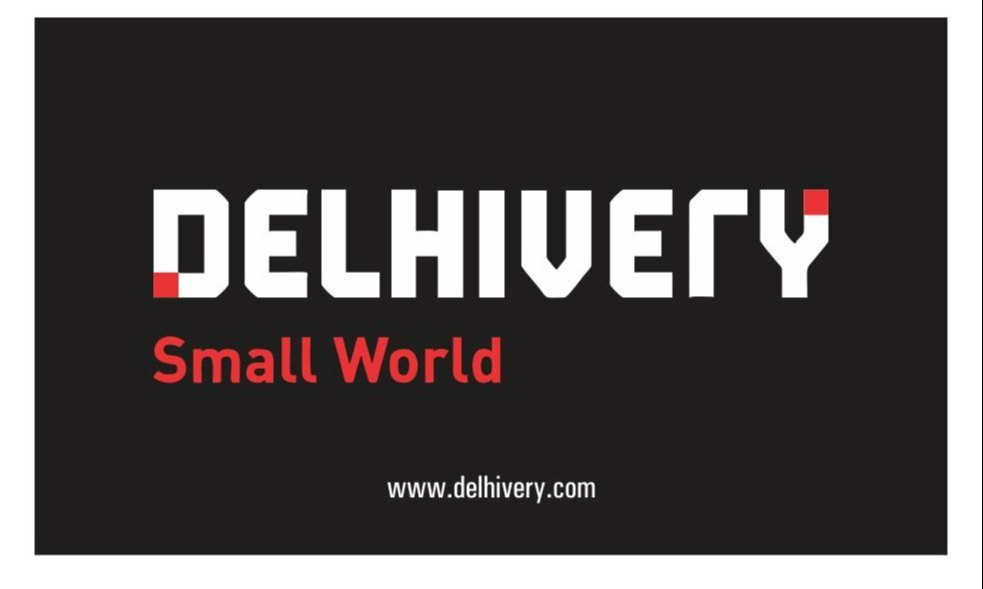

# **<font color ='red'>INTRODUCTION<font>**

**Delhivery** is **India's largest and fastest-growing fully integrated logistics company** by revenue. We are on a mission to build the operating system for commerce by combining world-class infrastructure, high-quality logistics operations, and cutting-edge engineering capabilities.

Since its inception in 2011, we have **successfully fulfilled over 2 billion orders across India**. Delhivery has built a nation-wide network with a presence in every state, servicing over 18,700+ pin codes. 24 automated sort centres, 94 gateways, 2880 direct delivery centres, and a team of over 57,000 people make it possible for us to deliver 24 hours a day, 7 days a week, 365 days a year.


**<font color = 'blue'>Problem Statement:<font>**

Delhivery seeks to extract meaningful insights from the massive flow of data emerging from its data engineering pipelines. The specific goals are:

- Clean, sanitize, and manipulate raw data to engineer useful features

- Understand and process large volumes of operational data

- Enable the Data Science team by preparing this data for building forecasting and optimization models

By addressing this, we aim to improve logistics efficiency, predictability, and decision-making power through robust data handling and modeling strategies.

**<font color = 'blue'>Goal:<font>**

- Indian states with source and destination delivery count
  - Destination state with delivery count
  - Source state with delivery count
- Feature engineering:
  - Creating features
  - Merging rows and aggregatinng fields
  - One-hot encoding of categorical variables
  - Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler
- Hypothesis Testing for different Numerical Fields.
- Find outliers in the numerical variables and check it using visual analysis


# **<font color ='red'>Importing Libraries<font>**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visual Analysis
import seaborn as sns   # Visual Analysis
from sklearn.preprocessing import OneHotEncoder # One_Hot_Encoding
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr                # Correlation
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Normalisation and Scaling

import warnings
warnings.filterwarnings("ignore")


# **<font color ='red'>Uploading Dataset and pd.read_csv()<font>**

In [ ]:
!gdown --id 1dpbXqWrkf9lZjgDRGAoCRxT8WvgDoBlD -O delhivery.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1dpbXqWrkf9lZjgDRGAoCRxT8WvgDoBlD
To: /content/delhivery.csv
100% 55.6M/55.6M [00:00<00:00, 57.0MB/s]


In [ ]:
df = pd.read_csv('delhivery.csv')

In [ ]:
df.head(5)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


# **<font color ='red'>DATA DICTIONARY:<font>**

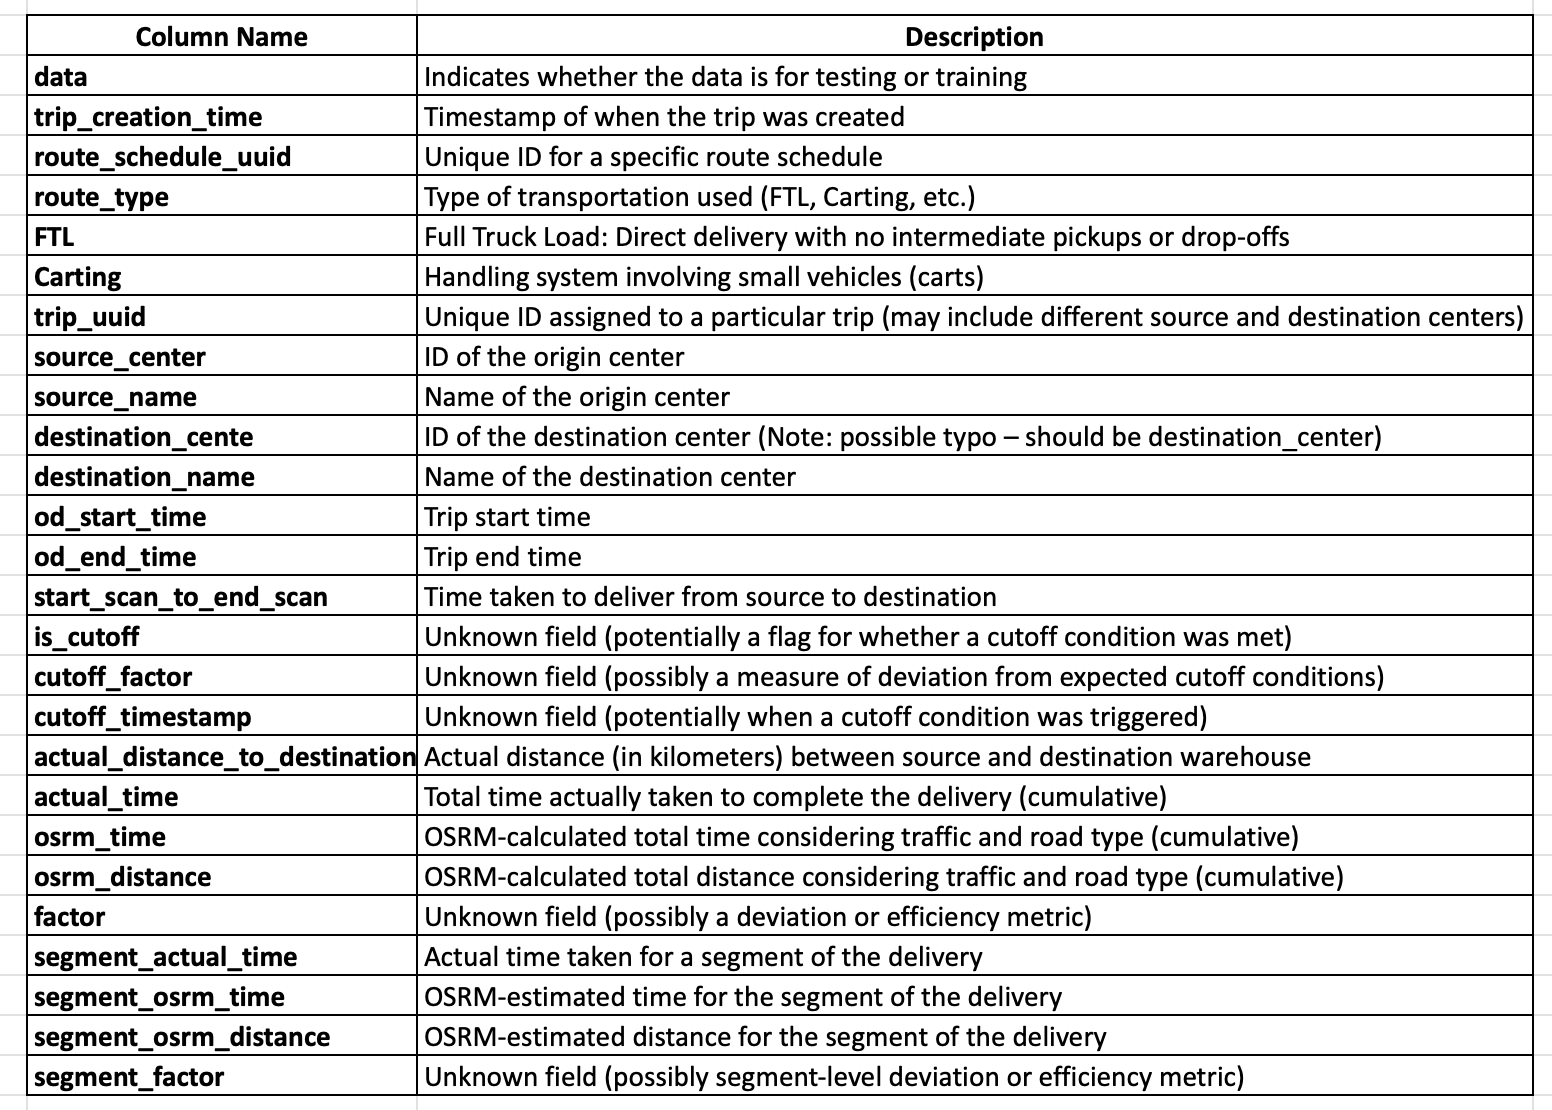

# **<font color ='red'>EXPLORATORY DATA ANALYSIS<font>**

**<font color ='blue'>Shape, Description, Attributes and Datatypes.<font>**

In [ ]:
# SHAPE OF THE DATASET - NO OF ROWS AND COLUMNS

print("Finding the shape of Dataset using 'df.shape'")
print("-----------------------------------------------")
print("No of Rows =", df.shape[0])
print("No of Columns =", df.shape[1])

Finding the shape of Dataset using 'df.shape'
-----------------------------------------------
No of Rows = 144867
No of Columns = 24


In [ ]:
# NAME OF COLUMNS AND THEIR DATATYPE

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

data: 2
trip_creation_time: 14817
route_schedule_uuid: 1504
route_type: 2
trip_uuid: 14817
source_center: 1508
source_name: 1498
destination_center: 1481
destination_name: 1468
od_start_time: 26369
od_end_time: 26369
start_scan_to_end_scan: 1915
is_cutoff: 2
cutoff_factor: 501
cutoff_timestamp: 93180
actual_distance_to_destination: 144515
actual_time: 3182
osrm_time: 1531
osrm_distance: 138046
factor: 45641
segment_actual_time: 747
segment_osrm_time: 214
segment_osrm_distance: 113799
segment_factor: 5675


<font color = 'blue'>This shows, there are 3 categorical columns:
- data - Training and test
- route_type - FTL and Carting
- is_cutoff - True and False </font>

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


**<font color= 'blue'>ANALYSIS:**</font>

- **start_scan_to_end_scan** Mean 961 mins (16 hrs), Potential long-tail deliveries.
- **actual_time** Mean 417min (7 hrs), max 3 days, high std deviation (598), again suggesting long tails.
- **segment_actual_time** Has negative values indicating presence of mis-information or anomaly.


In [ ]:
df.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-22 04:55:04.835022,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


# **<font color = 'blue'>DATA CLEANING:<font>**

Dropping unnecessary columns, after going through the data dictionary provided in the business case:
- <font color = 'blue'>'is_cutoff',
- 'cutoff_factor',
- 'cutoff_timestamp',
- 'factor',
- 'segment_factor'
- 'data'<font>

**<font color = 'blue'>Creating a copy of the dataset so as to save the original dataset undisturbed.**</font>

In [ ]:
df1=df.copy()

In [ ]:
df1.drop(columns=['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace=True)

In [ ]:
df1.groupby("data").data.value_counts()

,count
data,
test,40009
training,104858


**<font color ='blue'>ANALYSIS**</font>
- **<font color = 'blue'>Test data** is used to evaluate the model's performance **after training**</font>, to check how well it generalizes to unseen data. So it is <font color = 'blue'>**safe to drop the "data"** column</font> also to decrease the load on the machine for the purpose of Data Analysis.

In [ ]:
df1.drop(columns=['data'],inplace=True)

In [ ]:
df1.head(3)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152


# **<font color = 'blue'>HANDLING NULL VALUES**

In [ ]:
df1.isna().sum().sort_values(ascending=False).head(5)

,0
source_name,293
destination_name,261
route_schedule_uuid,0
trip_creation_time,0
trip_uuid,0


In [ ]:
df1.isna().sum()/df1.shape[0]*100     # PERCENTAGE OF ROWS HAVING NULL VALUES

,0
trip_creation_time,0.000000
route_schedule_uuid,0.000000
route_type,0.000000
trip_uuid,0.000000
source_center,0.000000
source_name,0.202254
destination_center,0.000000
destination_name,0.180165
od_start_time,0.000000
od_end_time,0.000000


**<font color ='blue'>ANALYSIS</font>**
- <font color = 'blue'>We can safely drop the Null values as they account to 0.2% of the data in the column.

In [ ]:
df1.dropna(inplace=True)

In [ ]:
print(df1.isnull().sum()[df1.isnull().sum() > 0].to_dict())

{}


In [ ]:
df1.reset_index(drop=True,inplace=True)

In [ ]:
df1.head(5)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153


# **<font color ='red'>FEATURE ENGINEERING<font>**
<font color ='blue'>**"SEGMENT_WISE AGGREGATION"**</font>

<font color= 'blue'>Creating a new feature</font> - **<font color = 'green'>SEGMENT KEY**</font> by merging 3 columns:

In [ ]:
df1['segment_key'] = df1['trip_uuid'] + df1['source_center'] + df1['destination_center']

df1["segment_actual_time_sum"] = df1.groupby("segment_key")["segment_actual_time"].cumsum()
df1["segment_osrm_distance_sum"] = df1.groupby("segment_key")["segment_osrm_distance"].cumsum()
df1["segment_osrm_time_sum"] = df1.groupby("segment_key")["segment_osrm_time"].cumsum()

df1[["segment_key","segment_actual_time_sum","segment_osrm_distance_sum","segment_osrm_time_sum"]].head(5)

,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153741093647649320IND388121AAAIND388620AAB,14.0,11.9653,11.0
1,trip-153741093647649320IND388121AAAIND388620AAB,24.0,21.7243,20.0
2,trip-153741093647649320IND388121AAAIND388620AAB,40.0,32.5395,27.0
3,trip-153741093647649320IND388121AAAIND388620AAB,61.0,45.5619,39.0
4,trip-153741093647649320IND388121AAAIND388620AAB,67.0,49.4772,44.0


**<font color ='blue'>ANALYSIS:</font>**

- **Segment Key** - Creates a unique key for each segment of a trip based on trip and location identifiers. This helps in grouping all related data points (e.g., scan checkpoints) of the same trip route.
- **segment_actual_time_sum** - Calculates cumulative actual time taken up to each scan/checkpoint in the segment. This gives insight into how the trip time accumulates over different stops or stages.
- **segment_osrm_distance_sum** - Calculates cumulative OSRM distance—the predicted/expected distance up to each point in the route. It reflects how the total estimated distance builds up over time.
- **segment_osrm_distance_sum** - Computes cumulative predicted time over the segment checkpoints. Helpful for comparing with actual time to detect delays or deviations.


In [ ]:
create_segment_dict = {
                      'trip_creation_time': 'first',
                      'route_schedule_uuid' : 'first',
                      'route_type' : 'first',
                      'trip_uuid' : 'first',
                      'source_center' : 'first',
                      'source_name' : 'first',
                      'od_start_time' : 'first',
                      'od_end_time' : 'first',
                      'start_scan_to_end_scan' : 'first',

                      'destination_center' : 'last',
                      'destination_name' : 'last',
                      'actual_distance_to_destination' : 'last',
                      'actual_time' : 'last',
                      'osrm_time' : 'last',
                      'osrm_distance' : 'last',
                      'segment_actual_time_sum' : 'last',
                      'segment_osrm_distance_sum' : 'last',
                      'segment_osrm_time_sum' : 'last',
                      }

In [ ]:
segment_df  = df1.groupby("segment_key").agg(create_segment_dict).reset_index()
segment_df.head(3)

,segment_key,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,od_start_time,od_end_time,start_scan_to_end_scan,destination_center,destination_name,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0


**<font color ='blue'>ANALYSIS:**</font>
- The number of rows after aggregation decreased from 1,44,867 to 26,222.

- **<font color = 'green'>This is a Crucial transformation step to move from granular, checkpoint-level data to trip segment-level summaries.</font>**

Grouping by segment_key, which represents each unique trip segment (based on trip UUID, source, and destination).

- **'first'** : for details that are static for the trip/segment and are the same for all rows (e.g., trip_uuid, source_center)

- **'last'** : for cumulative metrics and destination values, representing end-of-trip outcomes (e.g., actual_time, segment_actual_time_sum)

In [ ]:
segment_df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
count,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000,26222.000000
mean,298.553390,92.533054,200.926588,90.785333,114.975332,199.095645,125.587130,101.793341
std,441.116816,209.952355,385.730908,185.554359,254.426468,382.150687,286.670106,216.202739
min,20.000000,9.001351,9.000000,6.000000,9.072900,9.000000,9.072900,6.000000
25%,90.000000,21.654149,51.000000,25.000000,27.719150,50.000000,28.429100,25.000000
50%,152.000000,35.044329,84.000000,39.000000,43.543550,83.000000,45.797650,42.000000
75%,307.000000,65.557393,167.000000,72.000000,85.443950,166.000000,91.023575,79.000000
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,4504.000000,2640.924700,1938.000000


In [ ]:
segment_df = segment_df.sort_values(by=["segment_key","od_end_time"], ascending=True).reset_index()

In [ ]:
segment_df.head(10)

,index,segment_key,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,od_start_time,od_end_time,start_scan_to_end_scan,destination_center,destination_name,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0
5,5,trip-153671043369099517IND562132AAAIND000000ACB,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),1689.964663,2736.0,1528.0,2072.8556,2700.0,2227.5270,1710.0
6,6,trip-153671046011330457IND400072AABIND401104AAA,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
7,7,trip-153671052974046625IND583101AAAIND583201AAA,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,152.0,IND583201AAA,Hospet (Karnataka),59.530350,147.0,46.0,63.6461,147.0,63.6461,45.0
8,8,trip-153671052974046625IND583119AAAIND583101AAA,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 03:54:43.114421,2018-09-12 12:00:30.683231,485.0,IND583101AAA,Bellary_Dc (Karnataka),41.317614,131.0,44.0,53.5761,130.0,53.5761,44.0
9,9,trip-153671052974046625IND583201AAAIND583119AAA,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),2018-09-12 02:34:10.515593,2018-09-12 03:54:43.114421,80.0,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),26.600536,63.0,27.0,29.5696,63.0,29.5697,26.0


**<font color ='blue'>Changing columns with Date,Time to date and time datatype from existing object datatype.**</font>

In [ ]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           26222 non-null  int64  
 1   segment_key                     26222 non-null  object 
 2   trip_creation_time              26222 non-null  object 
 3   route_schedule_uuid             26222 non-null  object 
 4   route_type                      26222 non-null  object 
 5   trip_uuid                       26222 non-null  object 
 6   source_center                   26222 non-null  object 
 7   source_name                     26222 non-null  object 
 8   od_start_time                   26222 non-null  object 
 9   od_end_time                     26222 non-null  object 
 10  start_scan_to_end_scan          26222 non-null  float64
 11  destination_center              26222 non-null  object 
 12  destination_name                

In [ ]:
# Changing date and time columns' datatype to datetime() format

segment_df["trip_creation_time"] = pd.to_datetime(segment_df["trip_creation_time"])
segment_df["od_start_time"] = pd.to_datetime(segment_df["od_start_time"])
segment_df["od_end_time"] = pd.to_datetime(segment_df["od_end_time"])

**<font color = 'blue'>Creating new feature - od_time_diff_hour : difference between od_start-time and od_end_time</font>**

In [ ]:
segment_df["od_time_diff_hour"] = segment_df["od_end_time"] - segment_df["od_start_time"]
segment_df["od_time_diff_hour"]

,od_time_diff_hour
0,0 days 21:00:36.265275
1,0 days 16:39:30.322728
2,0 days 00:58:49.943264
3,0 days 02:02:46.769161
4,0 days 13:54:38.335721
...,...
26217,0 days 01:02:06.911603
26218,0 days 01:31:05.267810
26219,0 days 00:44:10.464194
26220,0 days 04:47:28.440393


In [ ]:
segment_df["od_time_diff_hour"] = segment_df["od_time_diff_hour"].dt.total_seconds() / 60
segment_df["od_time_diff_hour"]

,od_time_diff_hour
0,1260.604421
1,999.505379
2,58.832388
3,122.779486
4,834.638929
...,...
26217,62.115193
26218,91.087797
26219,44.174403
26220,287.474007


<font color = 'red'>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

<font color= 'blue'>**Creating new features by splitting source_name and destination_name fields to respective place-city-state-code for better segregation and analysis.**</font>

In [ ]:
# Extract State
# Extract "Haryana" from "Gurgaon_Bilaspur_HB (Haryana)"

def to_state(x):
    state = x.split('(')[1] # splits the string to 2 parts with second part starting after " ( "
    return state[:-1] # exclude ) from last

In [ ]:
# remove state and extract city
# Extract "Gurgaon" from "Gurgaon_Bilaspur_HB (Haryana)"

def to_city(x):
    city = x.split(' (')[0]
    city = city.split('_')[0]

    if city == 'pnq vadgaon sheri dpc':  # Edge cases
      return 'vadgaonsheri'

    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC','PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']

    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']:
        return 'pune'
    if city == 'hbr layout pc' :
      return 'bengaluru'
    if city == 'bhopal mp nagar' :
      return 'bhopal'
    if city == 'mumbai antop hill' :
      return 'mumbai'


    return city

In [ ]:
# remove state and extract place
# Extract "Bilaspur" from "Gurgaon_Bilaspur_HB (Haryana)"

def to_place(x):

    # removing state
    x = x.split(' (')[0]

    le = len(x.split('_'))  # calculate length of strings after splitting

    if le >= 3:
        return x.split('_')[1]

    if le == 2:             # small cities have same city and place name
        return x.split('_')[0]


    return x.split(' ')[0]

In [ ]:
# remove state and extract code
# Extract "HB" from "Gurgaon_Bilaspur_HB (Haryana)"

def to_code(x):

    # removing state
    x = x.split(' (')[0]

    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]

    return 'none'

In [ ]:
segment_df['source_state'] = segment_df['source_name'].apply(lambda x: to_state(x))
segment_df['source_city']  = segment_df['source_name'].apply(lambda x: to_city(x))
segment_df['source_place'] = segment_df['source_name'].apply(lambda x: to_place(x))
segment_df['source_code']  = segment_df['source_name'].apply(lambda x: to_code(x))

In [ ]:
segment_df['destination_state'] = segment_df['destination_name'].apply(lambda x: to_state(x))
segment_df['destination_city']  = segment_df['destination_name'].apply(lambda x: to_city(x))
segment_df['destination_place'] = segment_df['destination_name'].apply(lambda x: to_place(x))
segment_df['destination_code']  = segment_df['destination_name'].apply(lambda x: to_code(x))

In [ ]:
segment_df[["source_state","source_city","source_place","source_code","destination_state","destination_city","destination_place","destination_code"]]

,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code
0,Uttar Pradesh,Kanpur,Central,6,Haryana,Gurgaon,Bilaspur,HB
1,Madhya Pradesh,Bhopal,Trnsport,H,Uttar Pradesh,Kanpur,Central,6
2,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,Chikblapur,ShntiSgr,D
3,Karnataka,Tumkur,Veersagr,I,Karnataka,Doddablpur,ChikaDPP,D
4,Haryana,Gurgaon,Bilaspur,HB,Punjab,Chandigarh,Mehmdpur,H
...,...,...,...,...,...,...,...,...
26217,Tamil Nadu,Tirchchndr,Shnmgprm,D,Tamil Nadu,Thisayanvilai,UdnkdiRD,D
26218,Tamil Nadu,Peikulam,SriVnktpm,D,Tamil Nadu,Tirunelveli,VdkkuSrt,I
26219,Tamil Nadu,Eral,Busstand,D,Tamil Nadu,Tirchchndr,Shnmgprm,D
26220,Karnataka,Sandur,WrdN1DPP,D,Karnataka,Bellary,Bellary,none


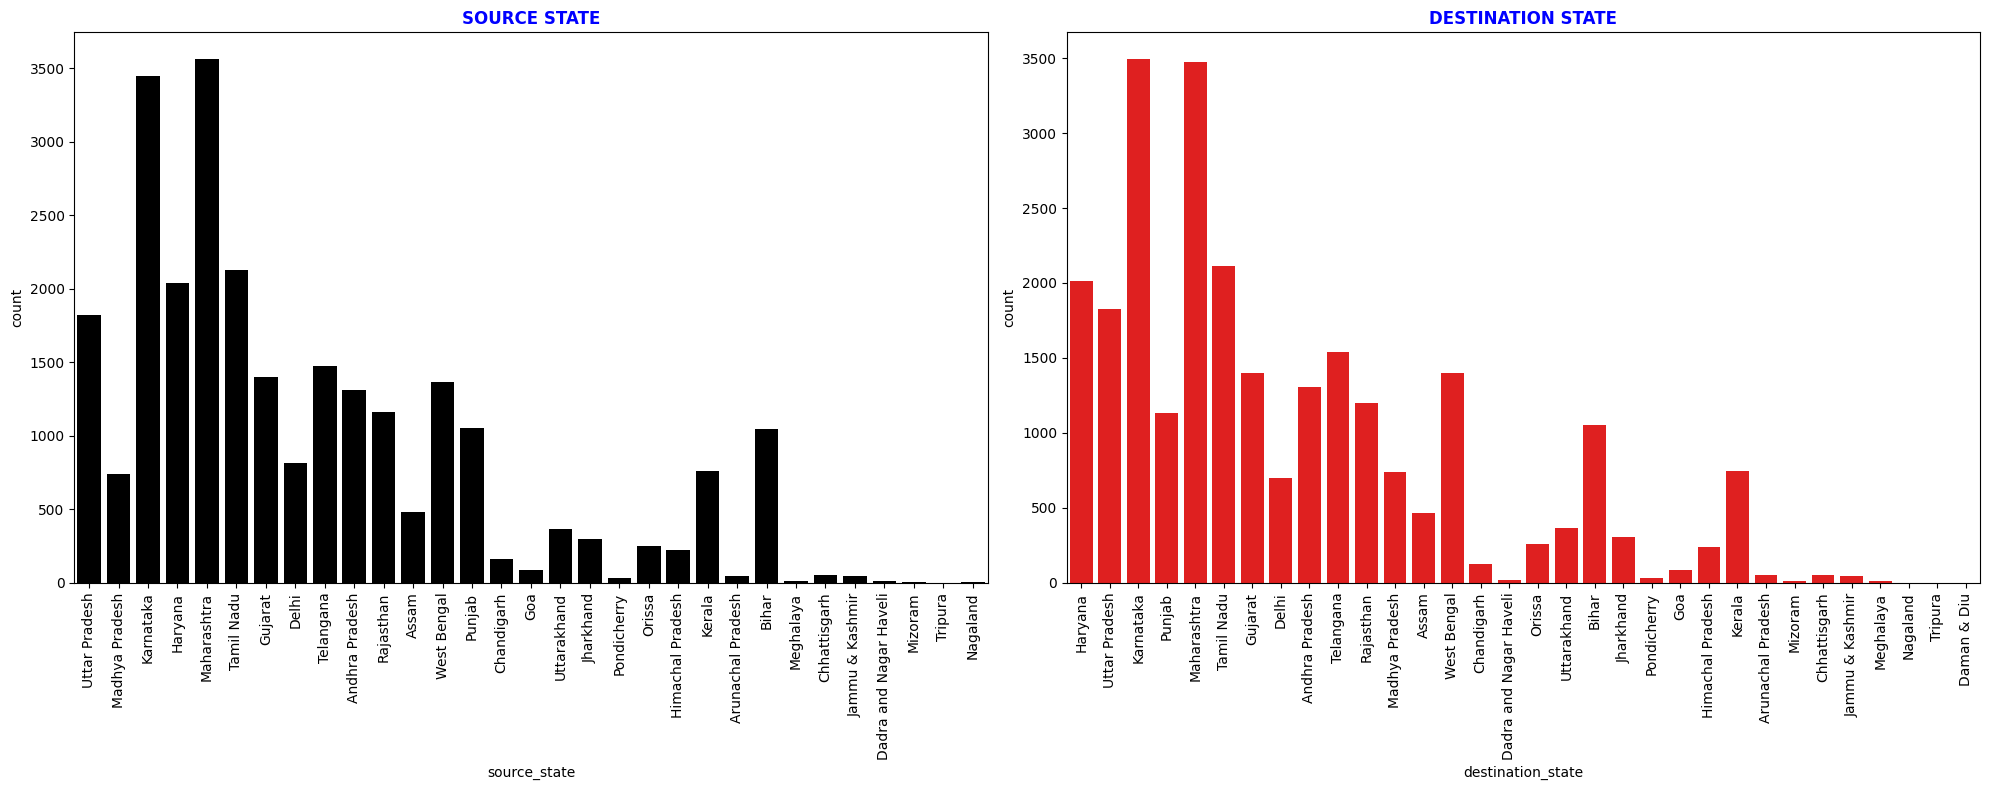

In [ ]:
plt.rcParams["figure.figsize"] = [20,8]
plt.subplot(1,2,1)
sns.countplot(data=segment_df, x='source_state',color = 'black')
plt.xticks(rotation=90)
plt.title('SOURCE STATE',color = 'blue', weight ='bold')

plt.subplot(1,2,2)
sns.countplot(data=segment_df, x='destination_state',color = 'RED')
plt.xticks(rotation=90)
plt.title('DESTINATION STATE',color = 'blue',weight ='bold')

plt.tight_layout()
plt.show()

<font color ='blue'>**ANALYSIS**</font>
- **Top source states:**
  - Maharashtra, Karnataka, Haryana are the highest contributors to outgoing trips.
  - This could indicate strong operational presence or logistics hubs.

- **Top destination states:**
  - Haryana, Uttar Pradesh, Karnataka, Punjab suggest major delivery or warehousing points.

- Some states like Meghalaya, Mizoram, Nagaland have almost no activity, which indicates **low operations in far-flung areas**.



In [ ]:
segment_df["state_combinations"] = segment_df["source_state"] + "_" + segment_df["destination_state"]
segment_df["state_combinations"].value_counts()

,count
state_combinations,
Maharashtra_Maharashtra,3255
Karnataka_Karnataka,3158
Tamil Nadu_Tamil Nadu,2021
Uttar Pradesh_Uttar Pradesh,1526
Telangana_Telangana,1315
...,...
Punjab_Maharashtra,1
Delhi_Assam,1
Jharkhand_Assam,1


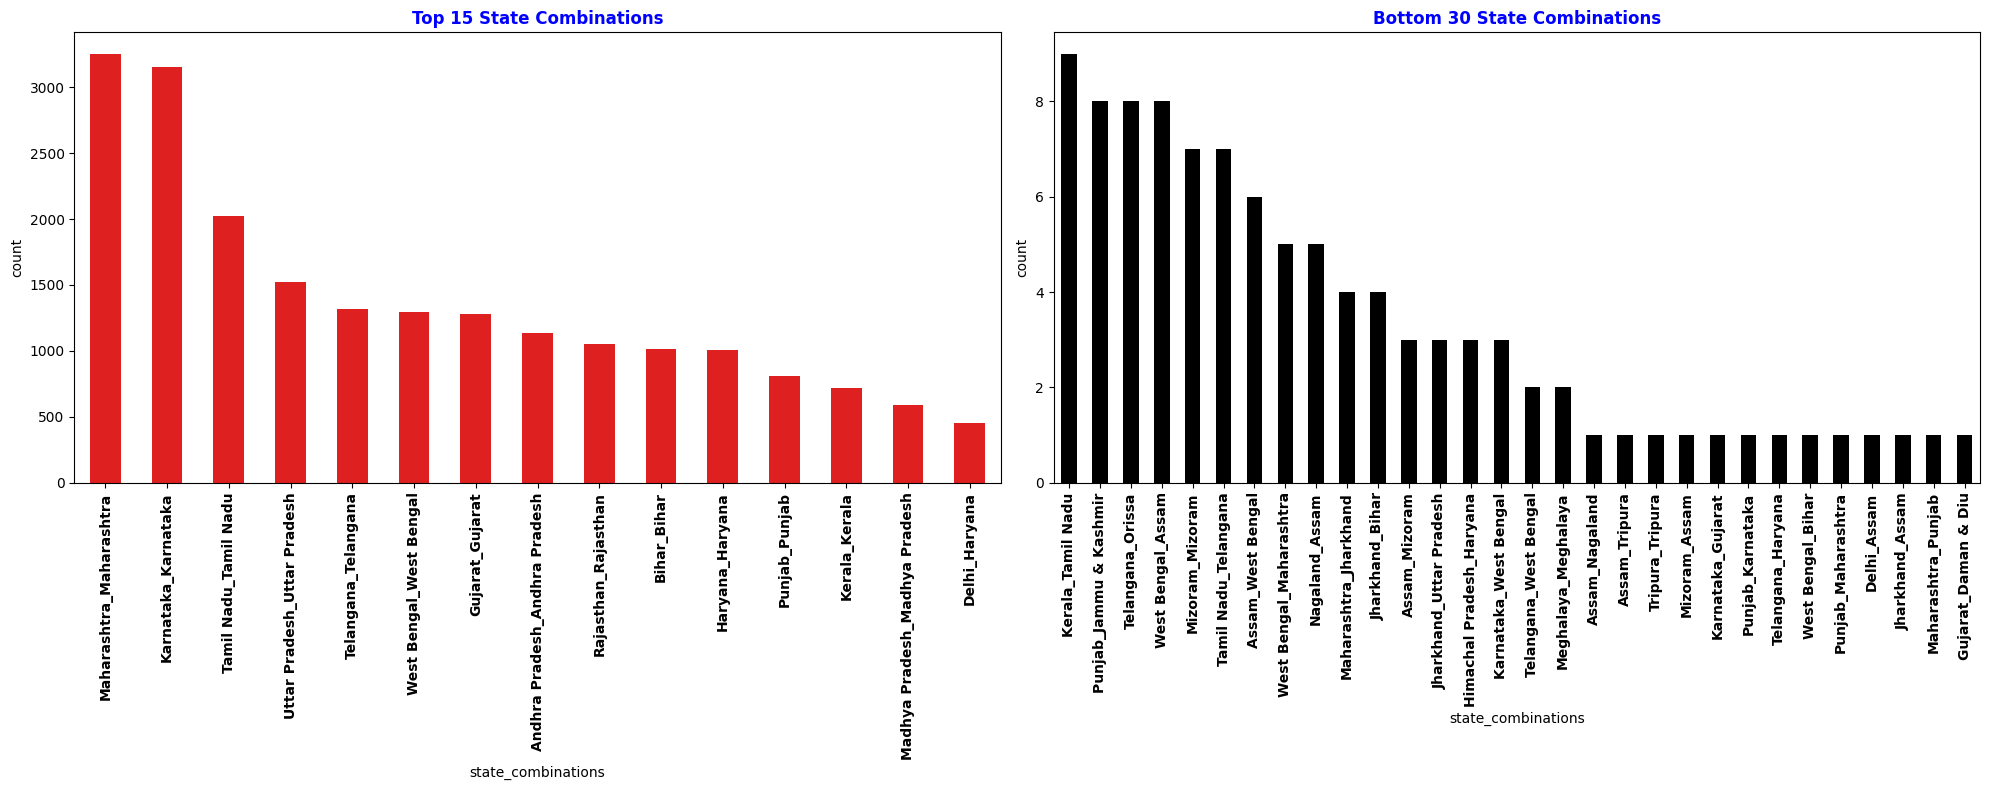

In [ ]:
plt.rcParams["figure.figsize"] = [20, 8]

top_states = segment_df['state_combinations'].value_counts().head(15).index
bottom_states = segment_df['state_combinations'].value_counts().tail(30).index

plt.subplot(1, 2, 1)
sns.countplot(data=segment_df[segment_df['state_combinations'].isin(top_states)],x='state_combinations', order=top_states,width =0.5,color = 'red')
plt.xticks(rotation=90,weight = 'bold')
plt.title('Top 15 State Combinations',weight = 'bold', color ='blue')

plt.subplot(1, 2, 2)
sns.countplot(data=segment_df[segment_df['state_combinations'].isin(bottom_states)],x='state_combinations', order=bottom_states,width = 0.5,color = 'black')
plt.xticks(rotation=90,weight = 'bold')
plt.title('Bottom 30 State Combinations',weight = 'bold', color ='blue')

plt.tight_layout()
plt.show()


**<font color ='blue'>ANALYSIS:**</font>
- **TOP 15 STATE-STATE COMBINATIONS**
  - **Intra-state traffic dominate:**
    - Maharashtra_Maharashtra, Karnataka_Karnataka, Tamil Nadu_Tamil Nadu are the top three.
    - **Suggests high volume of internal logistics** — possibly due to strong intra-state supply chains in industrial hubs.

  - **Other frequent order flows:**
    - Combinations like Uttar Pradesh_Uttar Pradesh, Telangana_Telangana also highlight strong local movement.

  - <font color ='green'>**High density industrial regions like Maharashtra, Karnataka, and Tamil Nadu appear multiple times—either intra-state or with neighboring states.**</font>

- **BOTTOM 50 STATE-STATE COMBINATIONS**

  - Majority of combinations have only 1 to 2 occurrences.

  - Frequently appearing states in the bottom combinations:
    - Assam, Nagaland, Mizoram, Tripura, Meghalaya - **suggests North-East region is logistically underrepresented**.

  - **Possible reasons:**
    - Lower industrial output
    - Geographical constraints (hilly terrain)
    - Lower demand/supply chain activities

  - **<font color ='green'>Many of these bottom combinations involve cross-regional flow (e.g., Punjab_Jammu & Kashmir, Delhi_Assam), which may be less common due to distance or logistical cost.**


<font color = 'blue'>**Converting trip_creation_time TO DATE/TIME datatype and extract new time features for Analysis.**</font>

In [ ]:
segment_df['trip_creation_time'] =  pd.to_datetime(segment_df['trip_creation_time'])

segment_df['trip_year'] = segment_df['trip_creation_time'].dt.year
segment_df['trip_month'] = segment_df['trip_creation_time'].dt.month
segment_df['trip_hour'] = segment_df['trip_creation_time'].dt.hour
segment_df['trip_day'] = segment_df['trip_creation_time'].dt.day
segment_df['trip_week'] = segment_df['trip_creation_time'].dt.isocalendar().week
segment_df['trip_dayofweek'] = segment_df['trip_creation_time'].dt.dayofweek

In [ ]:
segment_df[["trip_year","trip_month","trip_hour","trip_day","trip_week","trip_dayofweek"]].head(5)

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2
3,2018,9,0,12,37,2
4,2018,9,0,12,37,2


In [ ]:
segment_df[["trip_year","trip_month","trip_hour","trip_day","trip_week","trip_dayofweek"]].tail(5)

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
26217,2018,10,23,3,40,2
26218,2018,10,23,3,40,2
26219,2018,10,23,3,40,2
26220,2018,10,23,3,40,2
26221,2018,10,23,3,40,2


<font color = 'blue'>**UNIVARIATE ANALYSIS OF NEW FEATURES CREATED**</font>

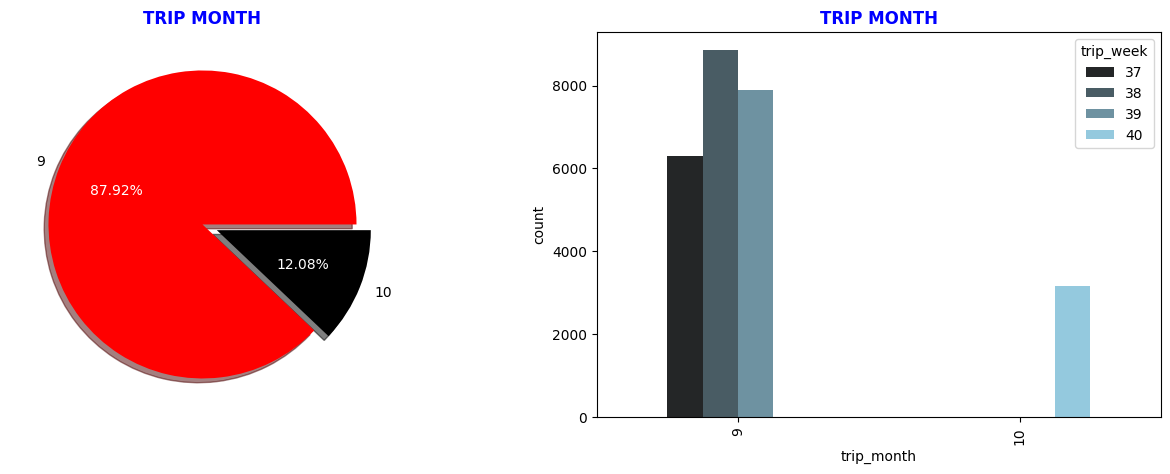

In [ ]:
plt.figure(figsize=(16,5))

def white_autopct(pct):
    return f'{pct:.2f}%'

plt.subplot(1, 2, 1)
wedges, texts, autotexts = plt.pie(
    data=segment_df,x=segment_df['trip_month'].value_counts(),shadow=True,labels=['9', '10'],colors=['red', 'black'],explode=(0, 0.1),autopct=white_autopct,textprops={'color': 'black'})
for autotext in autotexts:
    autotext.set_color('white')

plt.title('TRIP MONTH', weight='bold', color='blue')


plt.subplot(1, 2, 2)
sns.countplot(data=segment_df,x='trip_month',width =0.5,hue ='trip_week',color = 'skyblue' )
plt.xticks(rotation=90)
plt.title('TRIP MONTH',weight = 'bold', color ='blue')

plt.show()


<font color = 'blue'>**ANALYSIS:**</font>
- **Month Wise Distribution:**
  - Red label represents 87.92% of trips in September.
  - Black label represents 12.08% of trips in October.
  - <font color = 'green'>**This shows a heavy skew toward month 9 (September).**</font>
- **Week Wise Distribution:**
  - Majority of the activity is concentrated in weeks 37 to 39 (September).
  - Week 40 is the only one with activity in October (month 10).
- **<font color ='green'>Most trips happened in September, with very limited activity in October, and only in week 40.</font>**




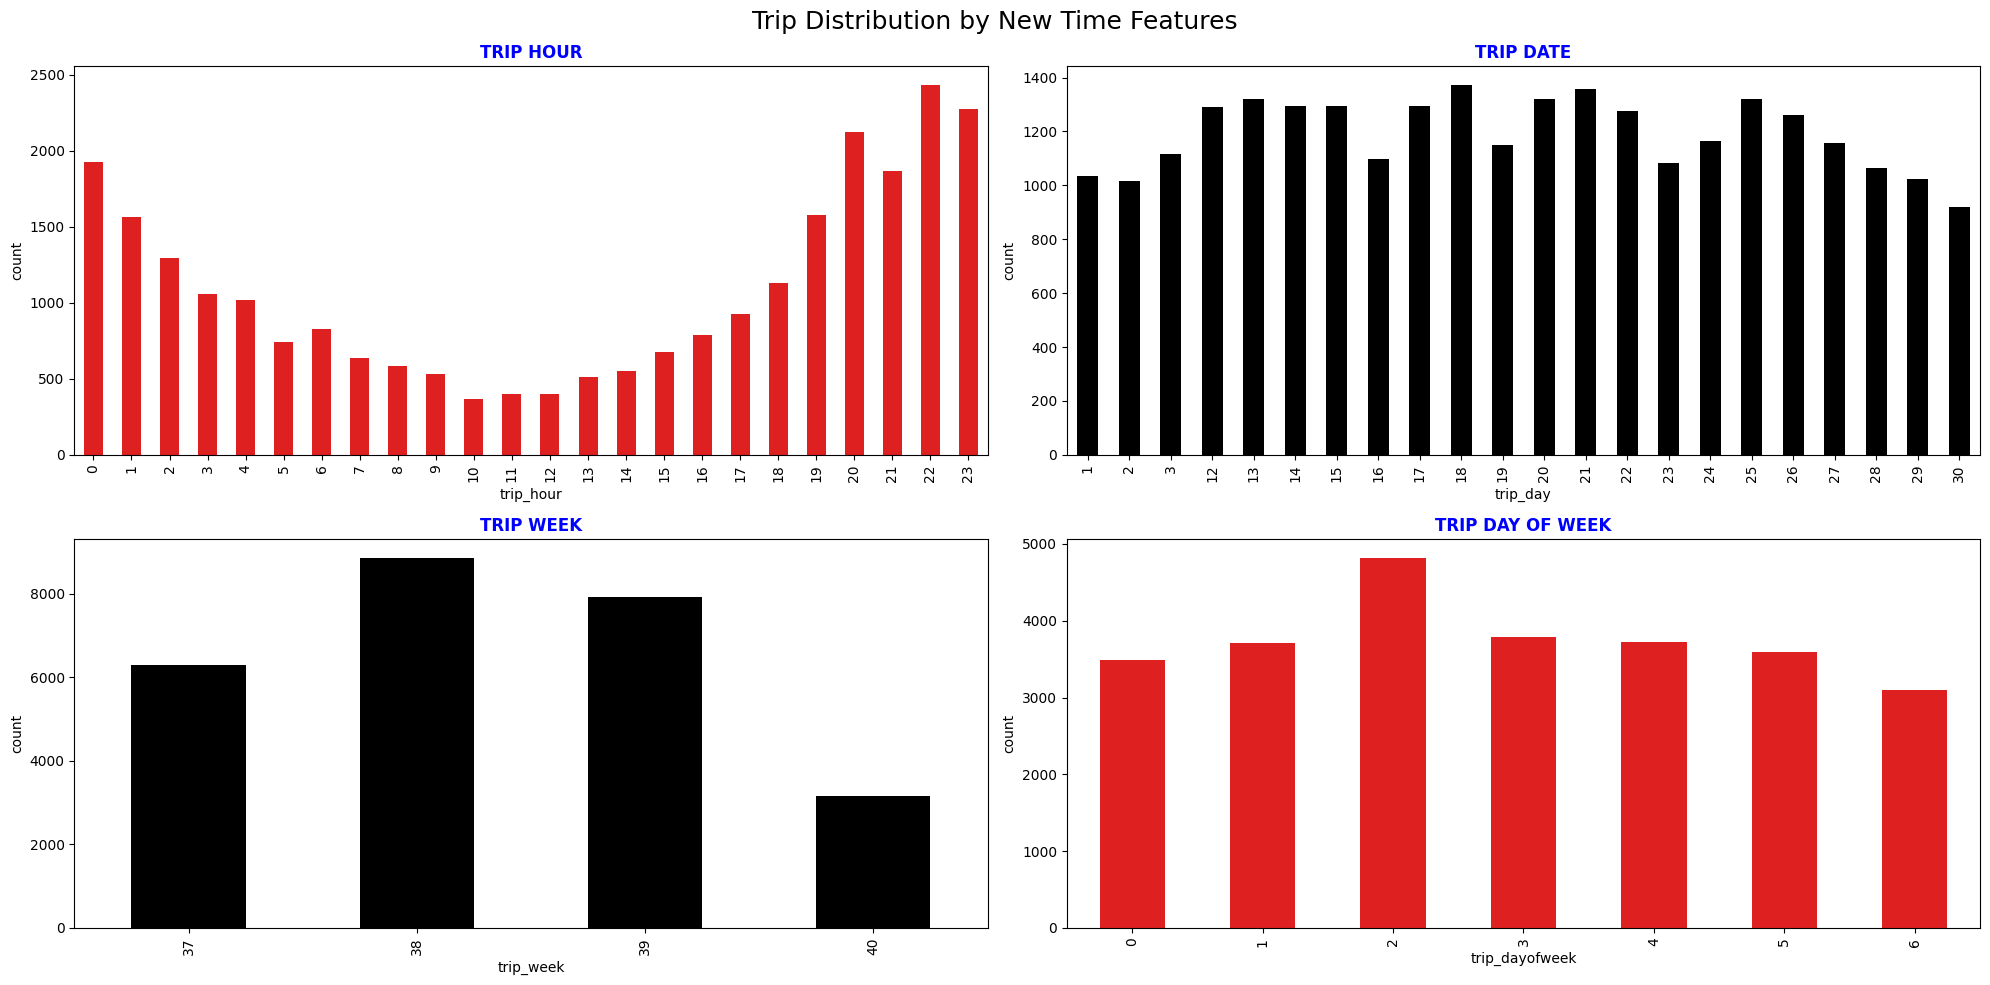

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.countplot(data=segment_df,x='trip_hour',width =0.5,color = 'red' )
plt.xticks(rotation=90)
plt.title('TRIP HOUR',weight = 'bold', color ='blue')

plt.subplot(2, 2, 2)
sns.countplot(data=segment_df,x='trip_day',width =0.5,color = 'black' )
plt.xticks(rotation=90)
plt.title('TRIP DATE',weight = 'bold', color ='blue')

plt.subplot(2, 2, 3)
sns.countplot(data=segment_df,x='trip_week',width =0.5,color = 'black' )
plt.xticks(rotation=90)
plt.title('TRIP WEEK',weight = 'bold', color ='blue')

plt.subplot(2, 2, 4)
sns.countplot(data=segment_df,x='trip_dayofweek',width =0.5,color = 'red' )
plt.xticks(rotation=90)
plt.title('TRIP DAY OF WEEK',weight = 'bold', color ='blue')


plt.suptitle("Trip Distribution by New Time Features", fontsize=18)
plt.tight_layout()
plt.show()


<font color ='blue'>**ANALYSIS:**</font>
- **Trip Hour**
    - **Evening 5 PM to Morning 6 AM shows maximum movement** indicating the passage of long container vehicles inside cities before restrictions are imposed by authorities.
    - **Steep drop at noon** - typical of office-commuting or business-travel behaviour.
- **Trip Date**
  - **Dates 4th to 11th show no trips** - indicating:
    - Data Missing, Logging Gap, ETL issues.
    - Probable Lock Down due to some major event.
    - Presence of extreme outliers which we removed in the initial phases.
  
  - Most dates between 13 and 22 show a little higher trip counts.
  - Whereas, the trips are **uncommonly even across the month, indicating the high logistic demand**.
    
- **Trip Day of Week**
  - Highest activity on day index 2 (likely Wednesday)
  - Fairly balanced across the week but dips on 6 (probably Sunday)



# **<font color ='red'>FEATURE ENGINEERING<font>**
<font color ='blue'>**"TRIP_WISE AGGREGATION"**</font>

In [ ]:
create_trip_dict = {
                    'trip_creation_time': 'first',
                    'route_schedule_uuid' : 'first',
                    'route_type' : 'first',
                    'trip_uuid' : 'first',
                    'source_center' : 'first',
                    'source_name' : 'first',

                    'destination_center' : 'last',
                    'destination_name' : 'last',

                    'start_scan_to_end_scan' : 'sum',
                    'od_time_diff_hour' : 'sum',
                    'actual_distance_to_destination' : 'sum',
                    'actual_time' : 'sum',
                    'osrm_time' : 'sum',
                    'osrm_distance' : 'sum',
                    'segment_actual_time_sum' : 'sum',
                    'segment_osrm_distance_sum' : 'sum',
                    'segment_osrm_time_sum' : 'sum',
                   }

In [ ]:
trip_df = segment_df.groupby("trip_uuid").agg(create_trip_dict).reset_index(drop = True)

In [ ]:
trip_df

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0
14783,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0
14784,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0
14785,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0


<font color ='blue'>**ANALYSIS:**
- **<font color ='green'>Aggregating multiple rows that belong to the same trip_uuid into a single trip-level row.</font>**
  - The number of rows further decreased to 14787 from 26222 during segment_wise aggregation.
  - We need to calculate trip-level analytics where each segment captures a portion of a journey, and the entire trip's stats are computed by summing those segments.

In [ ]:
trip_df.describe()

,trip_creation_time,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
count,14787,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000
mean,2018-09-22 12:26:28.269885696,529.429025,530.313517,164.090196,356.306012,160.990938,203.887411,353.059174,222.705466,180.511598
min,2018-09-12 00:00:16.535741,23.000000,23.461468,9.002461,9.000000,6.000000,9.072900,9.000000,9.072900,6.000000
25%,2018-09-17 02:38:18.128431872,149.000000,149.698496,22.777099,67.000000,29.000000,30.756900,66.000000,32.578850,30.000000
50%,2018-09-22 03:39:19.609193984,279.000000,279.710750,48.287894,148.000000,60.000000,65.302800,147.000000,69.784200,65.000000
75%,2018-09-27 19:23:14.074359552,632.000000,633.537697,163.591258,367.000000,168.000000,206.644200,364.000000,216.560600,184.000000
max,2018-10-03 23:59:42.701692,7898.000000,7898.551955,2186.531787,6265.000000,2032.000000,2840.081000,6230.000000,3523.632400,2564.000000
std,NaN,658.254936,658.415490,305.502982,561.517936,271.459495,370.565564,556.365911,416.846279,314.679279


<font color ='blue'>**ANALYSIS**</font>

- **Duration**
  - There is a large gap between actual and OSRM times (nearly 2x). This suggests frequent delays, slow movement, or poor route estimations.
  - Most trips are under 4-6 hours, but some are exceptionally long (potential data issues or real-world edge cases).
- **Distance**
  - In some cases, actual distances are shorter than OSRM distances. This might indicate manual rerouting, shortcuts, or inconsistencies in mapping.
- <font color='green'>**There is a generally consistent relationship between segment and trip-level sums suggesting efficient aggregation.**</font>

In [ ]:
trip_df['delay_ratio'] = trip_df['actual_time'] / trip_df['osrm_time']

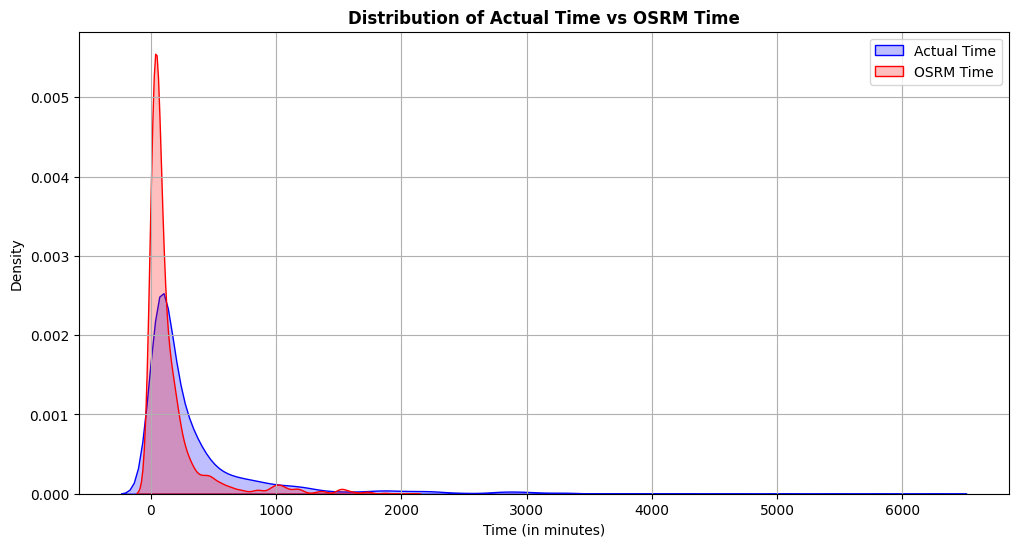

In [ ]:
plt.figure(figsize=(12,6))

sns.kdeplot(trip_df['actual_time'], label='Actual Time', fill=True, color='blue')
sns.kdeplot(trip_df['osrm_time'], label='OSRM Time', fill=True, color='red')

plt.title('Distribution of Actual Time vs OSRM Time', weight='bold')
plt.xlabel('Time (in minutes)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

<font color ='blue'>**ANALYSIS**</font>

- **OSRM time distribution (red)** is **narrower and more peaked** — indicating consistent, likely <font color ='green'>optimistic predictions.</font>
- **Actual time distribution (blue) is wider** — indicating <font color ='green'>more variability, longer delays.</font>
- <font color ='green'>OSRM predictions are tight and perhaps underestimate travel time.</font>
- <font color ='green'>Real-world factors (traffic, delays) cause a heavier tail in actual time.</font'>


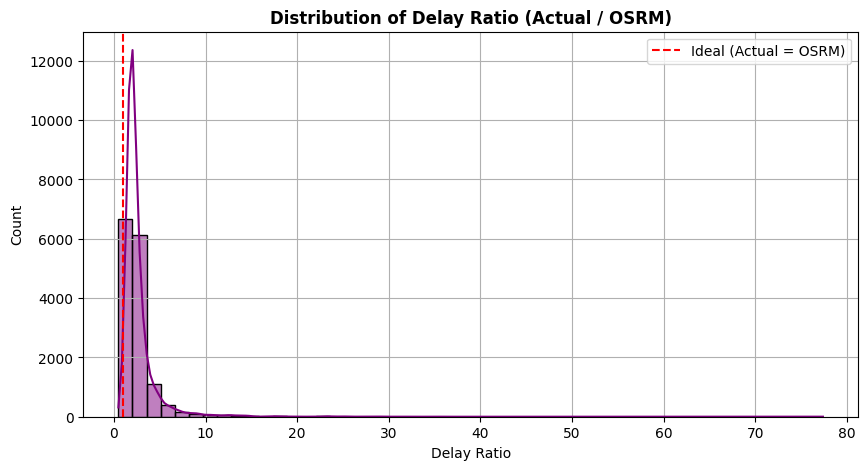

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(trip_df['delay_ratio'], bins=50, kde=True, color='purple')
plt.axvline(x=1, color='red', linestyle='--', label='Ideal (Actual = OSRM)')
plt.title('Distribution of Delay Ratio (Actual / OSRM)', weight='bold')
plt.xlabel('Delay Ratio')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


<font color ='blue'>**ANALYSIS**</font>

- The histogram is **highly right-skewed**, with most values concentrated around 1 and 3.
- The **red dashed line indicates the ideal ratio = 1 (Actual time = OSRM time)**.
- Many trips are just above 1, which is expected due to traffic, stops, or signal delays.
- **Long tail on the right confirms presence of extreme outliers.**
- **Most trips are only slightly delayed compared to OSRM estimates.**
- A few trips skew the average heavily due to extremely high delay ratios.

In [ ]:
trip_df.sort_values(by='delay_ratio', ascending=False).head(10)[['trip_uuid', 'actual_time', 'osrm_time', 'delay_ratio']]


,trip_uuid,actual_time,osrm_time,delay_ratio
7571,trip-153761568647456368,2399.0,31.0,77.387097
1807,trip-153691774924973666,770.0,11.0,70.000000
1023,trip-153682944027974510,1006.0,16.0,62.875000
8192,trip-153768532629219880,1081.0,21.0,51.476190
2555,trip-153700839622813110,2536.0,50.0,50.720000
6756,trip-153751878739026869,1005.0,23.0,43.695652
3089,trip-153706705984334815,1153.0,29.0,39.758621
11338,trip-153809667984245845,567.0,16.0,35.437500
4484,trip-153724277262741136,1067.0,31.0,34.419355
2801,trip-153704259509954539,527.0,16.0,32.937500


<font color ='blue'>**ANALYSIS**</font>

- Sorting trips by **delay_ratio = actual_time / osrm_time**, in descending order.
  - The top trip has a delay ratio of 77.39, meaning the actual travel time was 77x longer than OSRMs predicted time — suggesting a massive outlier.
  - Even the 10th trip still has a ratio of 32.94, which is unusually high.
- **These indicate extreme outliers** — possibly due to:
  - Traffic incidents or road closures
  - Incorrect/missing data (OSRM time too low?)
  - Very long idle times included in actual_time

 <font color ='green'> These visualizations help quantify where OSRM underperforms.</font>

# <font color ='red'>**OUTLIERS**</font>
<font color ='blue'>**"IDENTIFICATION AND HANDLING"**</font>

In [ ]:
numeric_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum', 'od_time_diff_hour']

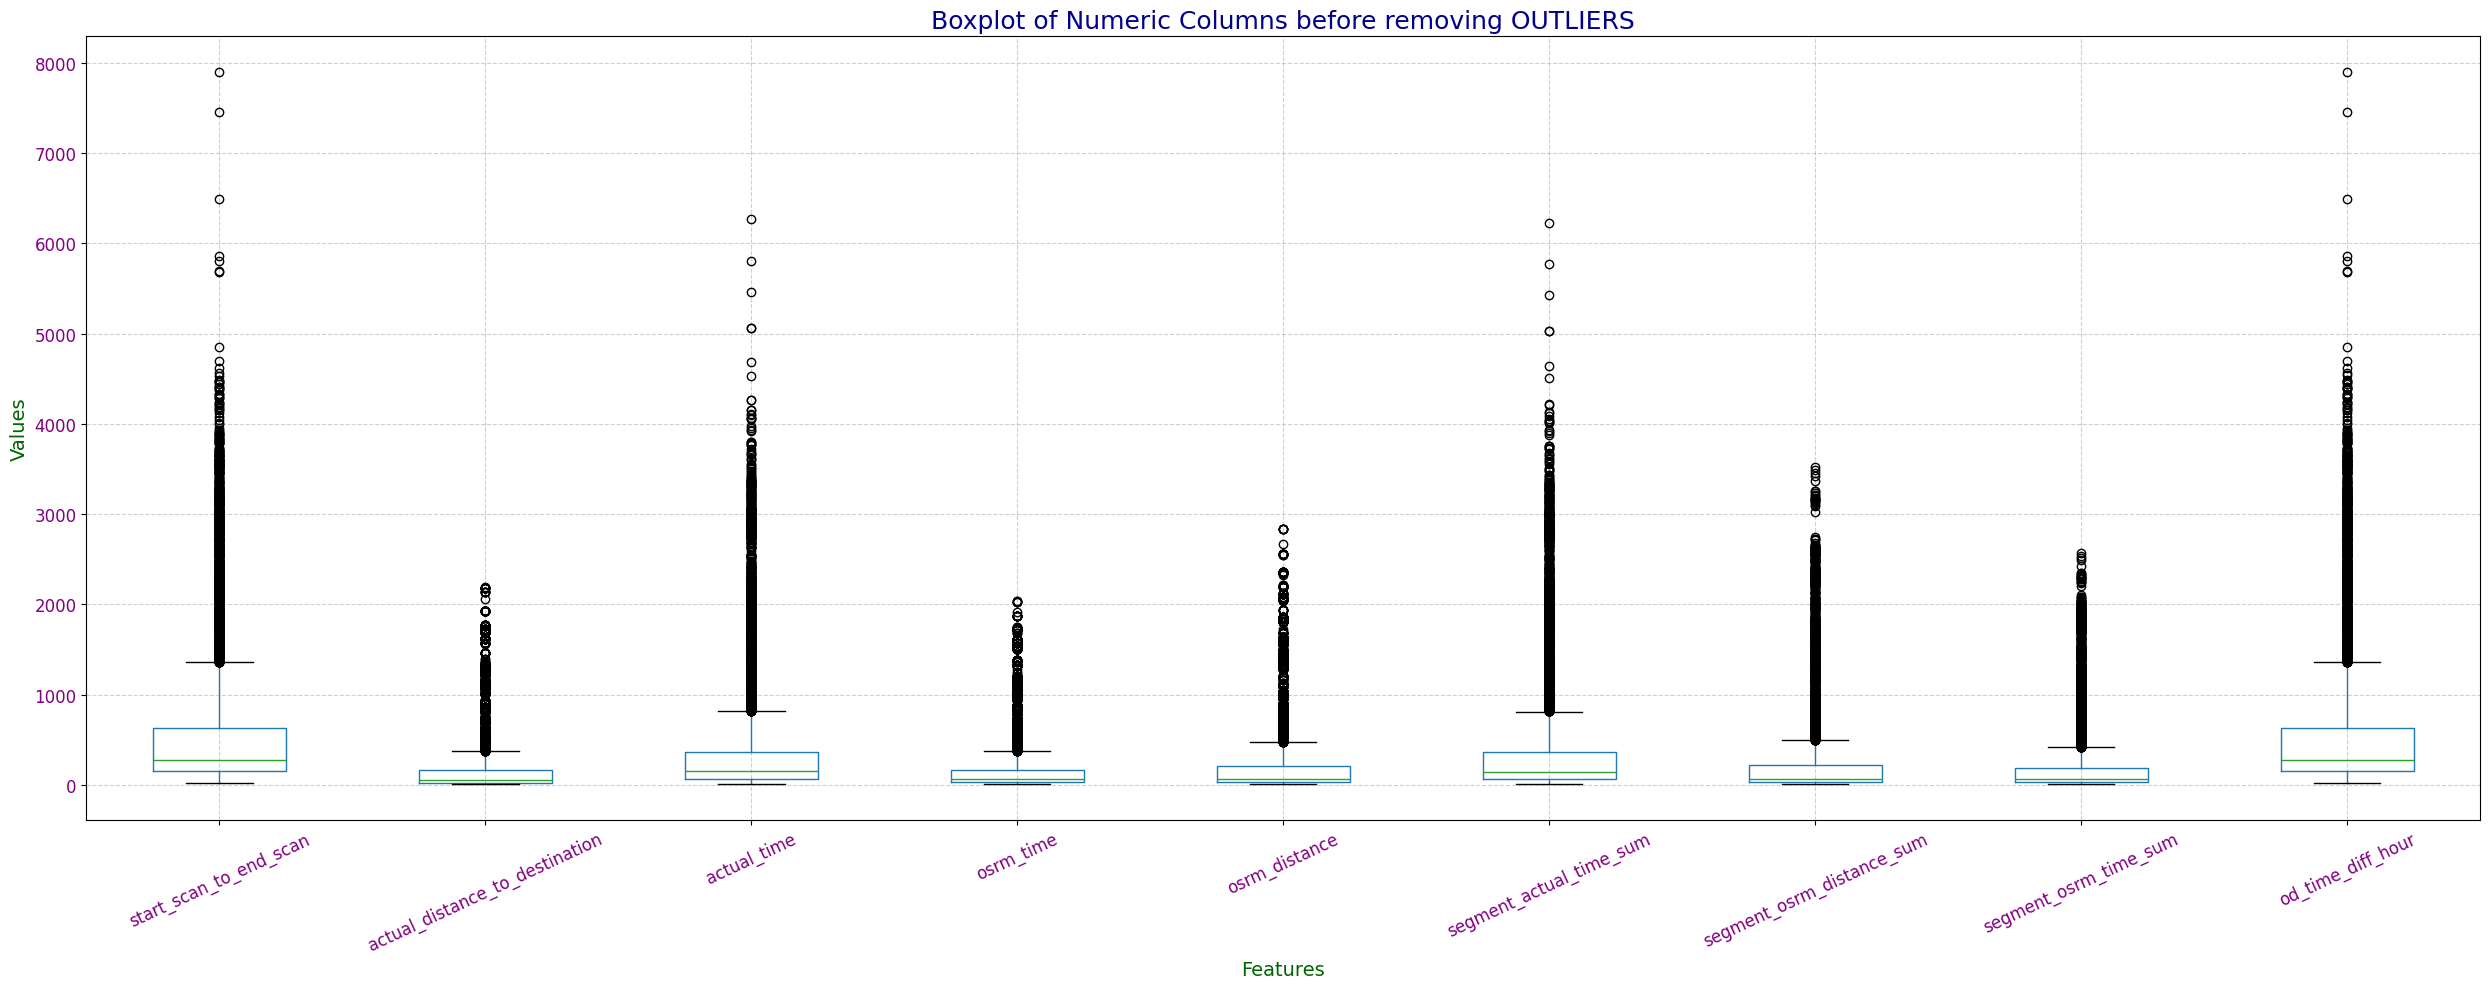

In [ ]:
plt.figure(figsize=(25, 10))

trip_df[numeric_columns].boxplot(rot=25)

plt.title('Boxplot of Numeric Columns before removing OUTLIERS', fontsize=18, color='darkblue')
plt.xlabel('Features', fontsize=14, color='darkgreen')
plt.ylabel('Values', fontsize=14, color='darkgreen')
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')

plt.tight_layout()
plt.show()

In [ ]:
Q1 = trip_df[numeric_columns].quantile(0.25)
Q3 = trip_df[numeric_columns].quantile(0.75)

IQR = Q3 - Q1

In [ ]:
outliers = []
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in numeric_columns:
    lb = lower_bound[col]
    ub = upper_bound[col]
    # Get outliers in this column
    outliers_in_col = trip_df[(trip_df[col] < lb) | (trip_df[col] > ub)][col].tolist()
    outliers.extend(outliers_in_col)

# Print
print("Lower Bound:\n", lower_bound)
print("Upper Bound:\n", upper_bound)
#print("Identified Outliers:\n", outliers)

Lower Bound:
 start_scan_to_end_scan           -575.500000
actual_distance_to_destination   -188.444140
actual_time                      -383.000000
osrm_time                        -179.500000
osrm_distance                    -233.074050
segment_actual_time_sum          -381.000000
segment_osrm_distance_sum        -243.393775
segment_osrm_time_sum            -201.000000
od_time_diff_hour                -576.060306
dtype: float64
Upper Bound:
 start_scan_to_end_scan            1356.500000
actual_distance_to_destination     374.812497
actual_time                        817.000000
osrm_time                          376.500000
osrm_distance                      470.475150
segment_actual_time_sum            811.000000
segment_osrm_distance_sum          492.533225
segment_osrm_time_sum              415.000000
od_time_diff_hour                 1359.296499
dtype: float64


In [ ]:

# mask of valid rows (no outliers)
mask = ~((trip_df[numeric_columns] < lower_bound) | (trip_df[numeric_columns] > upper_bound)).any(axis=1)

# applying mask to the same dataset to remove rows with outliers
trip_df = trip_df[mask]

In [ ]:
trip_df

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,delay_ratio
1,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,2.102941
3,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,3.933333
4,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,2.914530
5,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),189.0,190.487849,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0,2.652174
6,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,98.005634,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0,1.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,2018-10-03 23:55:56.258533,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,trip-153861095625827784,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),257.0,258.028928,57.762332,83.0,62.0,73.4630,82.0,64.8551,62.0,1.338710
14783,2018-10-03 23:57:23.863155,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,trip-153861104386292051,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),60.0,60.590521,15.513784,21.0,12.0,16.0882,21.0,16.0883,11.0,1.750000
14784,2018-10-03 23:57:44.429324,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,trip-153861106442901555,IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),IND208006AAA,Kanpur_GovndNgr_DC (Uttar Pradesh),421.0,422.119867,38.684839,282.0,48.0,58.9037,281.0,104.8866,88.0,5.875000
14785,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND628204AAA,Tirchchndr_Shnmgprm_D (Tamil Nadu),347.0,348.512862,134.723836,264.0,179.0,171.1103,258.0,223.5324,221.0,1.474860


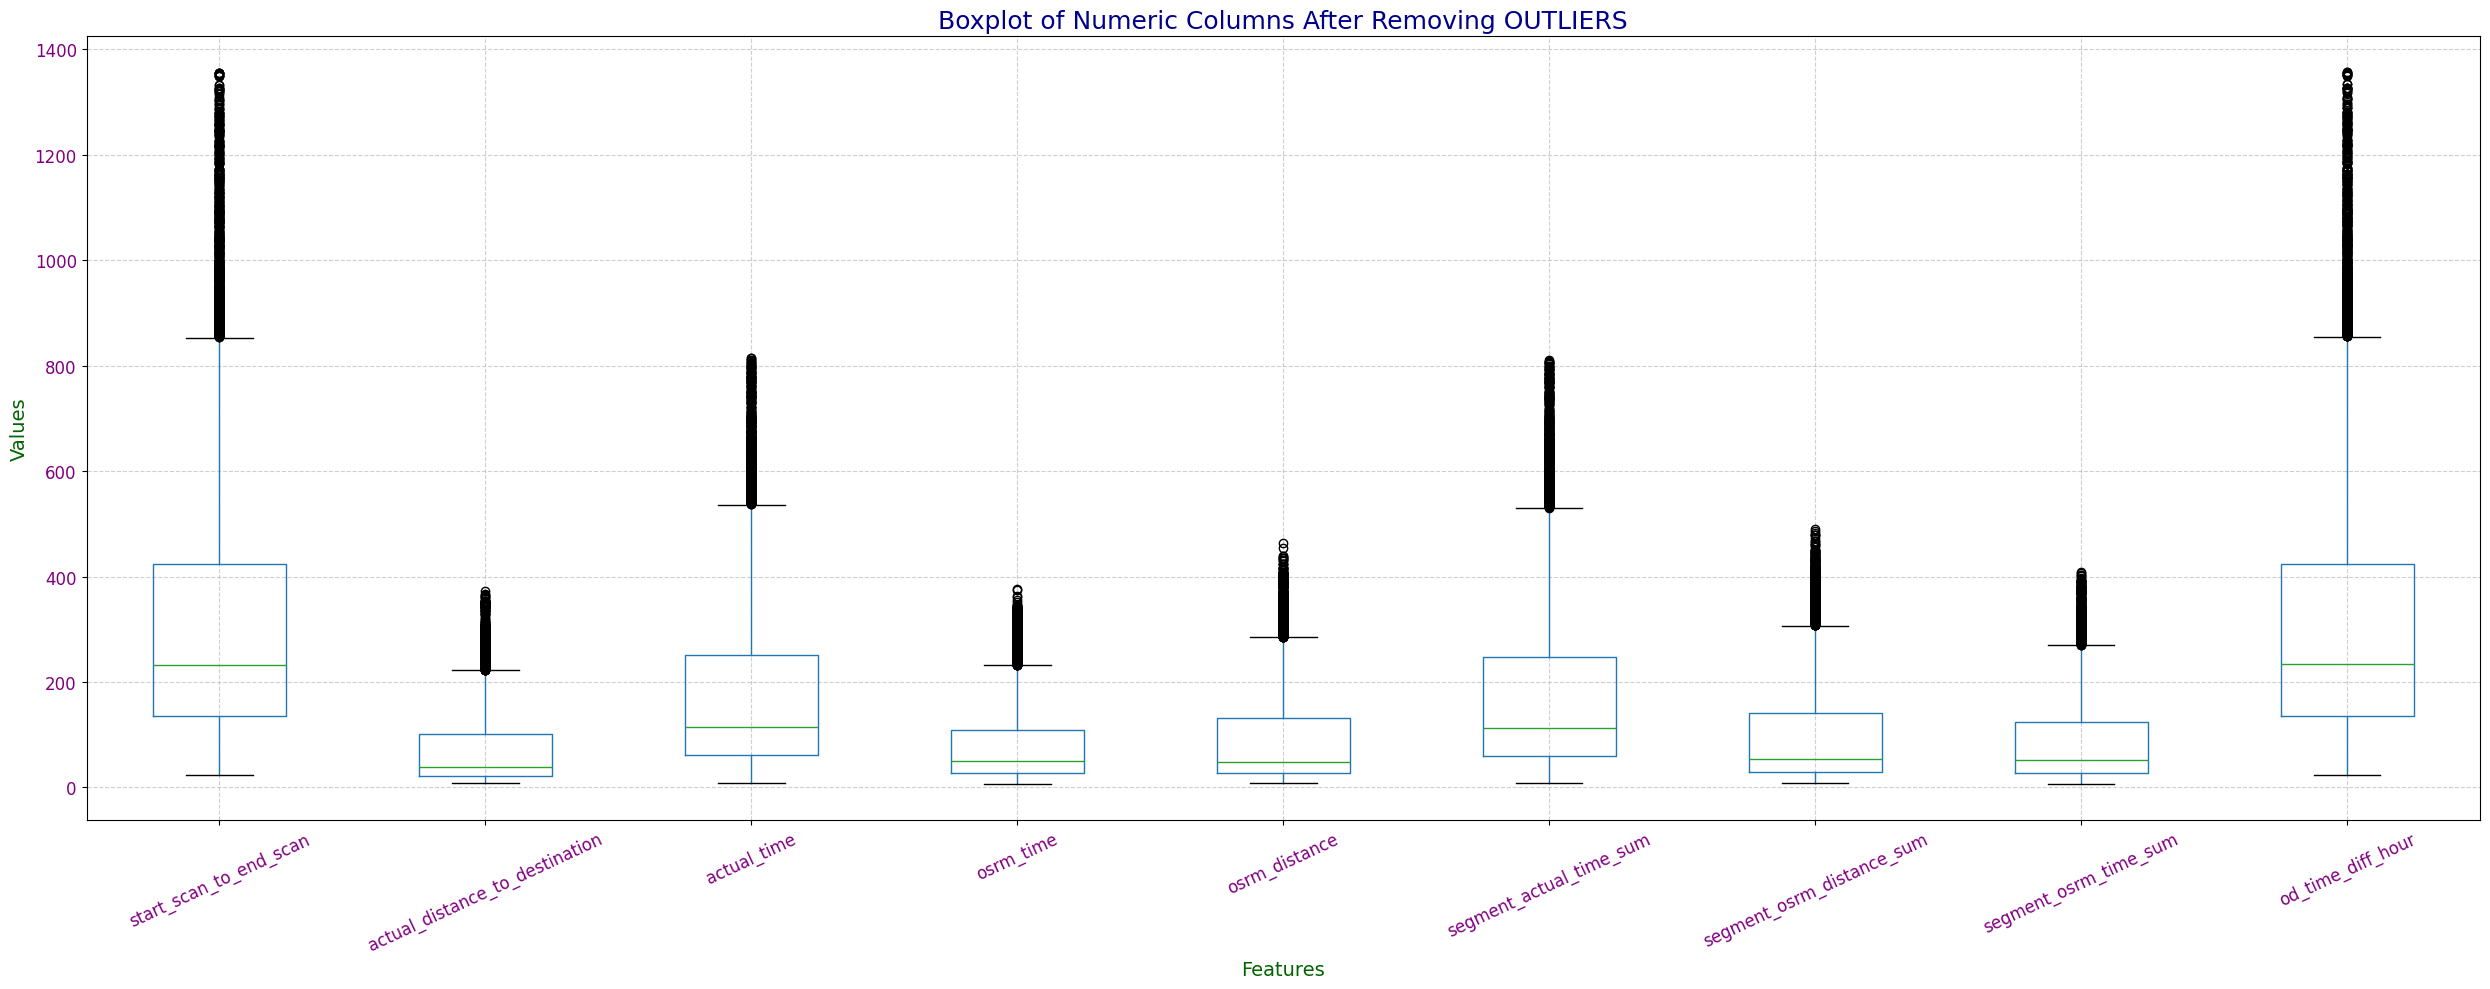

In [ ]:
plt.figure(figsize=(25, 10))

trip_df[numeric_columns].boxplot(rot=25)

plt.title('Boxplot of Numeric Columns After Removing OUTLIERS', fontsize=18, color='darkblue')
plt.xlabel('Features', fontsize=14, color='darkgreen')
plt.ylabel('Values', fontsize=14, color='darkgreen')
plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=12, color='purple')
plt.yticks(fontsize=12, color='purple')

plt.tight_layout()
plt.show()


<font color ='blue'>**ANALYSIS**</font>

- **Visual Effects of Outlier Removal**
  - Whisker length shrinks significantly.
  - Box height (IQR) remains similar, indicating core distributions are intact.
  - Outlier dots are greatly reduced, making the charts more interpretable.
- <font color ='green'>This means outlier removal is preserving the distribution's core while trimming excessive values, which is exactly what we want in robust preprocessing.</font>

- **Feature-Specific Insights**
  - start_scan_to_end_scan and od_time_diff_hour seem to have had massive outliers.
  - Features like osrm_time and osrm_distance had more moderate outliers, possibly due to route planning constraints.
  - Segment-based sums (e.g., segment_actual_time_sum) follow a similar pattern to their single counterparts, but benefit from the same cleaning effect.

- **<font color ='green'>Outlier treatment here is clearly effective and beneficial.</font>**
- **<font color ='green'>We have a cleaner dataset that's more representative of typical behavior.</font>**
- **<font color ='green'>This will lead to more stable models and fewer issues with skewness, heteroscedasticity, or poor generalization.</font>**

# <font color = 'red'>**ONE HOT ENCODING FOR CATEGORICAL COLUMNS**</font>

In [ ]:
trip_df.describe(include = object)

,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,12723,12723,12723,12723,12723,12723,12723
unique,1360,2,12723,902,902,1002,1002
top,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,trip-153861118270144424,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,53,8812,1,669,669,554,554


In [ ]:
trip_df["route_type"].value_counts()

,count
route_type,
Carting,8812
FTL,3911


Text(0.5, 1.0, 'ROUTE TYPE')

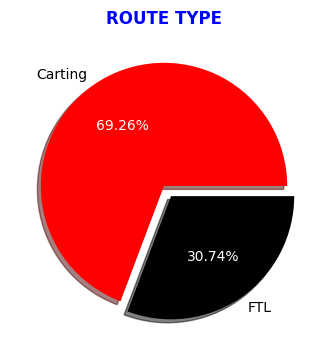

In [ ]:
plt.figure(figsize=(6,4))

def white_autopct(pct):
    return f'{pct:.2f}%'

wedges, texts, autotexts = plt.pie(
    data=trip_df,x=trip_df['route_type'].value_counts(),shadow=True,labels=['Carting', 'FTL'],colors=['red', 'black'],explode=(0, 0.1),autopct=white_autopct,textprops={'color': 'black'})
for autotext in autotexts:
    autotext.set_color('white')

plt.title('ROUTE TYPE', weight='bold', color='blue')

<font color= 'blue'>**ANALYSIS:**</font>

- **Value Counts Table**
  - Carting: 8,812 entries
  - FTL (Full Truck Load): 3,911 entries
  - Total: 12,723 entries
- **Pie Chart Breakdown**
  - Carting: 69.26%
  - FTL: 30.74%
- This shows that **Carting routes dominate the dataset, making up more than two-thirds of all trips.**
- **Operationally, most deliveries appear to be small-load or multi-stop (Carting), possibly needing optimization around routing efficiency.**

In [ ]:
# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Fit and transform the 'route_type' column
ohe_encoded = ohe.fit_transform(trip_df[["route_type"]])
print(ohe_encoded.shape, ohe_encoded[:5])

(12723, 2) [[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [ ]:
trip_df["route_type"].head(10)

,route_type
1,Carting
3,Carting
4,FTL
5,Carting
6,Carting
7,Carting
8,Carting
9,Carting
10,Carting
11,Carting


In [ ]:
encoded_cols = ohe.get_feature_names_out(["route_type"])
encoded_cols

array(['route_type_Carting', 'route_type_FTL'], dtype=object)

In [ ]:
encoded_df = pd.DataFrame(ohe_encoded, columns=encoded_cols, index=trip_df.index).astype(int)
encoded_df

,route_type_Carting,route_type_FTL
1,1,0
3,1,0
4,0,1
5,1,0
6,1,0
...,...,...
14782,1,0
14783,1,0
14784,1,0
14785,1,0


**CONCAT the trip_df and encoded_df to get the new view**

In [ ]:
encoded_trip_df = pd.concat([trip_df.drop(columns=["route_type"]), encoded_df], axis=1)

In [ ]:
encoded_trip_df[["trip_creation_time","route_schedule_uuid", "trip_uuid","route_type_Carting", "route_type_FTL"]].head(5)

,trip_creation_time,route_schedule_uuid,trip_uuid,route_type_Carting,route_type_FTL
1,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,trip-153671042288605164,1,0
3,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,trip-153671046011330457,1,0
4,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,trip-153671052974046625,0,1
5,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,trip-153671055416136166,1,0
6,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,trip-153671066201138152,1,0


**Applying Label Encoding to verify the difference between One Hot Encoding**

In [ ]:
col="route_type"
label_encoder=LabelEncoder()
trip_df[col]=label_encoder.fit_transform(trip_df[col])

trip_df[col].value_counts()

,count
route_type,
0,8812
1,3911


In [ ]:
trip_df[col].head()

,route_type
1,0
3,0
4,1
5,0
6,0


In [ ]:
trip_df.head()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,delay_ratio
1,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0,2.102941
3,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0,3.933333
4,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0,2.914530
5,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,0,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),189.0,190.487849,24.597048,61.0,23.0,28.0647,60.0,28.0647,23.0,2.652174
6,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,0,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,98.005634,9.100510,24.0,13.0,12.0184,24.0,12.0184,13.0,1.846154


<font color = 'blue'>**ANALYSIS:**</font>

- **Label Encoding** gives Carting = 0, FTL = 1
  - This implies an order (like FTL > Carting), which might mislead linear models.
- **One Hot Encoding** indicates:
    - Creates 2 new columns - **route_type_Carting** and **route_type_FTL**
    - “These are just categories, not ranks.”
    - Keeps the data unbiased for models that care about numerical magnitude.

# <font color ='red'>**NORMALISATION & STANDARDISATION - NUMERICAL COLUMNS**</font>

<font color = 'red'>**Creating a copy of the dataset to apply Normalisation and Standardisation**</font>

In [ ]:
standard_scaler_df = trip_df.copy()
minmaxscaler_df = trip_df.copy()

In [ ]:
scaler = StandardScaler()
standard_scaler_df[numeric_columns] = scaler.fit_transform(standard_scaler_df[numeric_columns])

In [ ]:
standard_scaler_df[numeric_columns].head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
1,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
3,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
4,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
5,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
6,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585


In [ ]:
scaler = MinMaxScaler()
minmaxscaler_df[numeric_columns] = scaler.fit_transform(minmaxscaler_df[numeric_columns])

In [ ]:
minmaxscaler_df[numeric_columns].head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
1,0.117868,0.176119,0.166253,0.167568,0.167335,0.164794,0.156330,0.146766,0.118559
3,0.057808,0.022426,0.062035,0.024324,0.023343,0.062422,0.022484,0.024876,0.057749
4,0.521021,0.325009,0.411911,0.300000,0.303075,0.413233,0.286617,0.271144,0.520930
5,0.124625,0.042791,0.064516,0.045946,0.041795,0.063670,0.039525,0.042289,0.125213
6,0.056306,0.000269,0.018610,0.018919,0.006482,0.018727,0.006130,0.017413,0.055883


<font color ='blue'>**ANALYSIS**</font>

- **Applying MinMaxScaler():**
  - Scales each feature individually to a given range, usually [0, 1].
  - Keeps all the values positive.
  - Compresses outliers into the [0,1] range (may preserve outliers less well).
  - Makes small scale features more comparable to large scale ones.
  - Useful for **algorithms that don't assume a distribution (e.g., KNN, Neural Networks).**

- **Applying StandardScaler():**
  - Standardizes features by removing the mean and scaling to unit variance.
  - Makes features have mean = 0 and std = 1.
  - Keeps outliers but centers the data.
  - Negative values can occur.
  - Useful for **algorithms that assume normally-distributed data**.

# <font color = 'red'>**HYPOTHESIS TESTING**</font>


<font color = 'green'>Perform hypothesis testing / visual analysis between :


* <font color = 'green'>   actual_time aggregated value and OSRM time aggregated value.
* <font color = 'green'>  actual_time aggregated value and segment actual time aggregated
value.
* <font color = 'green'>  OSRM distance aggregated value and segment OSRM distance
aggregated value.

* <font color = 'green'>  OSRM time aggregated value and segment OSRM time aggregated value.

<font color = 'blue'>**As all the parameters to be tested are Numerical, we need to use Correlation Testing to check the Hypothesis.**</font>

In [ ]:
trip_df[numeric_columns].skew()

,0
start_scan_to_end_scan,1.461887
actual_distance_to_destination,1.485214
actual_time,1.451405
osrm_time,1.442568
osrm_distance,1.440438
segment_actual_time_sum,1.458996
segment_osrm_distance_sum,1.426506
segment_osrm_time_sum,1.395665
od_time_diff_hour,1.460849


In [ ]:
trip_df[numeric_columns].kurt()

,0
start_scan_to_end_scan,1.777602
actual_distance_to_destination,1.499871
actual_time,1.670030
osrm_time,1.400529
osrm_distance,1.282760
segment_actual_time_sum,1.703838
segment_osrm_distance_sum,1.302613
segment_osrm_time_sum,1.300351
od_time_diff_hour,1.772426


<font color= 'blue'>**ANALYSIS:**</font>
- **Skewness**
  - Data has skewness values around 1.4 - 1.5, which suggests **Moderately positively skewed**.
  - A bunch of lower values.
  - A few very large outliers.
- **Kurtosis**
  - Your kurtosis is around 1.3 - 1.7 which suggests **flatter-than-normal distributions with lighter tails.**  
  - Not many extreme outliers, but not very peaky either.

**Using <font color ='blue'>Pearsons coefficient</font> to check the Hypothesis for the numerical columns**

- **Null Hypothesis (Ho)** - There is no relation between the varibales.
- **Alternate Hypothesis (Ha)** - There is significant relation between the variables.
- Next we **calculate the p-value** and check with the **significance level = 0.05 i.e. confidence level of 95%**
- if p-value < 0.05 : Reject Ho
- if p-value > 0.05 : Fail to reject the Ho

In [ ]:
def test_correlation(df, col1, col2):
    coef, p = pearsonr(df[col1], df[col2])
    print(f"\n Testing: {col1} vs {col2}")
    print(f"Correlation Coefficient: {coef:.3f}")
    print(f"P-value: {p:.4f}")
    if p < 0.05:
        print("Significant relationship (Reject H0)")
    else:
        print("No significant relationship (Fail to reject H0)")


In [ ]:
test_correlation(trip_df, 'actual_time', 'osrm_time')
test_correlation(trip_df, 'actual_time', 'segment_actual_time_sum')
test_correlation(trip_df, 'osrm_distance', 'segment_osrm_distance_sum')
test_correlation(trip_df, 'osrm_time', 'segment_osrm_time_sum')



 Testing: actual_time vs osrm_time
Correlation Coefficient: 0.860
P-value: 0.0000
Significant relationship (Reject H0)

 Testing: actual_time vs segment_actual_time_sum
Correlation Coefficient: 1.000
P-value: 0.0000
Significant relationship (Reject H0)

 Testing: osrm_distance vs segment_osrm_distance_sum
Correlation Coefficient: 0.979
P-value: 0.0000
Significant relationship (Reject H0)

 Testing: osrm_time vs segment_osrm_time_sum
Correlation Coefficient: 0.973
P-value: 0.0000
Significant relationship (Reject H0)


**RESULT OF HYPOTHESIS TESTING**

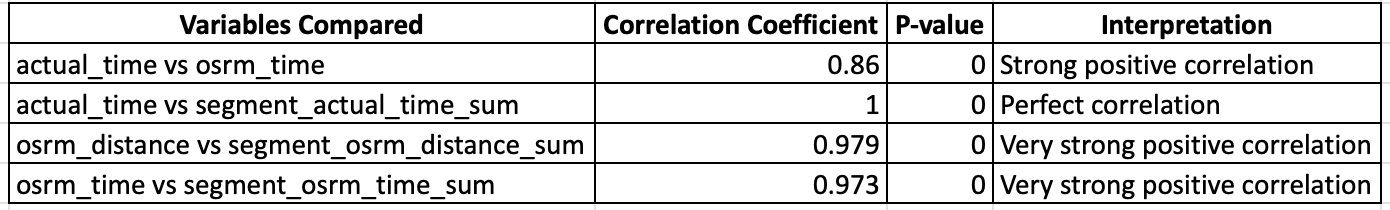

<font color = 'blue'>**ANALYSIS:**</font>

- **Perfect Correlation (1.000)** between **actual_time and segment_actual_time_sum** implies that the actual_time is exactly the sum of its segments.
- **osrm_distance and segment_osrm_distance_sum**, and **osrm_time with segment_osrm_time_sum** show **very high correlation**
- The correlation between **actual_time and osrm_time (0.860) is strong, but not perfect.**
  - This suggests:
    - OSRM predicted times are good approximations of actual times.
- Some variability exists, possibly due to real-world conditions not accounted for in OSRM predictions.
- All p-values are 0, well below the significance threshold (0.05).
  - **Therefore, all relationships are statistically significant, and the null hypothesis of no correlation is rejected in each case.**

<font color = 'green'>**To confirm the test, we can plot individual graphs to showcase the relationships.**</font>

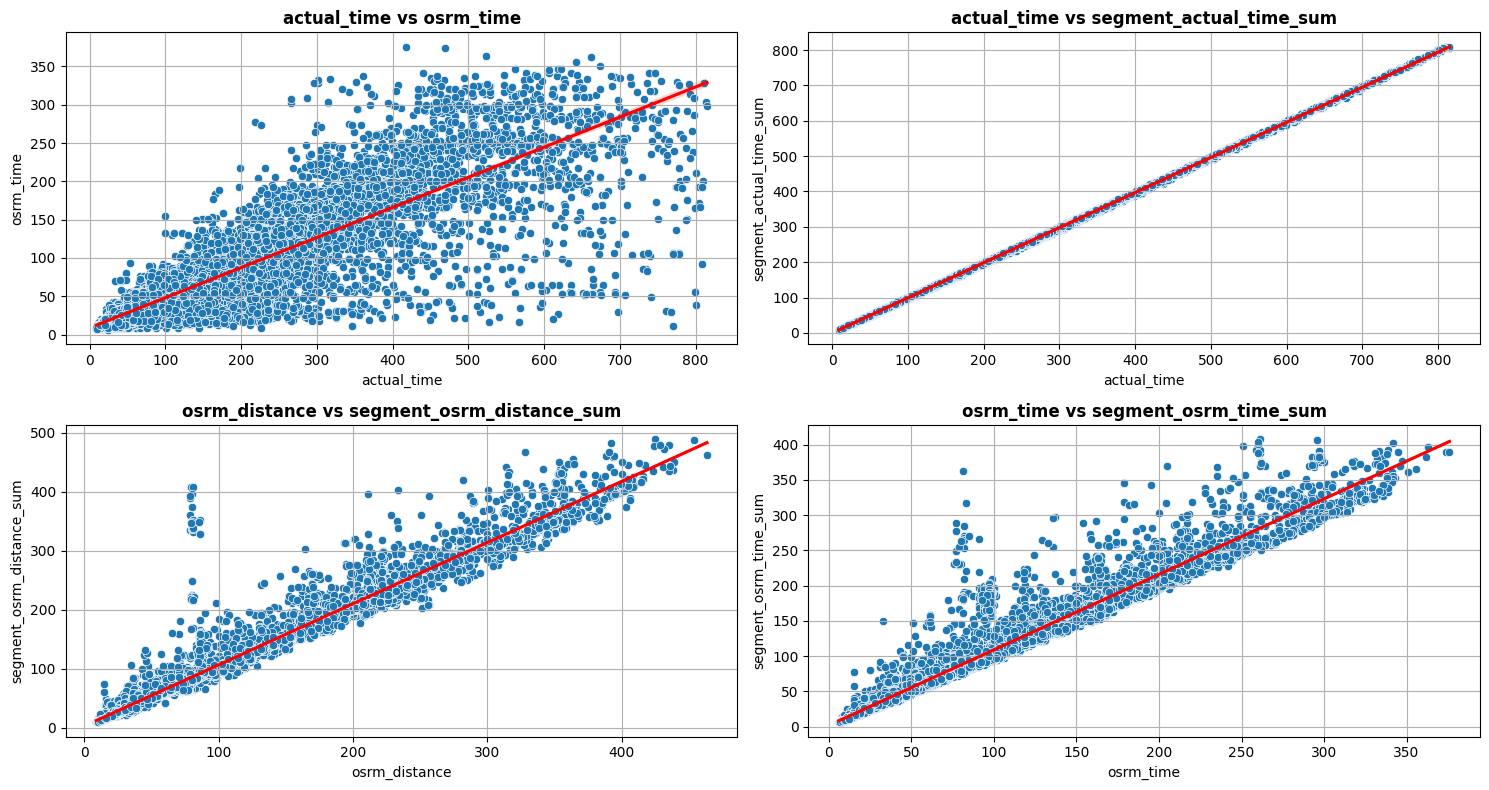

In [ ]:
def plot_relations_grid(trip_df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))
    axes = axes.flatten()

    pairs = [
        ('actual_time', 'osrm_time'),
        ('actual_time', 'segment_actual_time_sum'),
        ('osrm_distance', 'segment_osrm_distance_sum'),
        ('osrm_time', 'segment_osrm_time_sum')
    ]

    for i, (x, y) in enumerate(pairs):
        sns.scatterplot(data=trip_df, x=x, y=y, ax=axes[i])
        sns.regplot(data=trip_df, x=x, y=y, scatter=False, color='red', ax=axes[i])
        axes[i].set_title(f'{x} vs {y}', weight='bold')
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

plot_relations_grid(trip_df)


<font color = 'blue'>**ANLAYSIS:**</font>

- These plots visually reinforce the statistical findings.
- **All relationships are statistically significant.**
- Segment-based aggregations are highly accurate and consistent with their overall counterparts.
- OSRM predictions (time and distance) correlate well with actual observations, though actual time has more real-world variability than the more deterministic OSRM estimates.

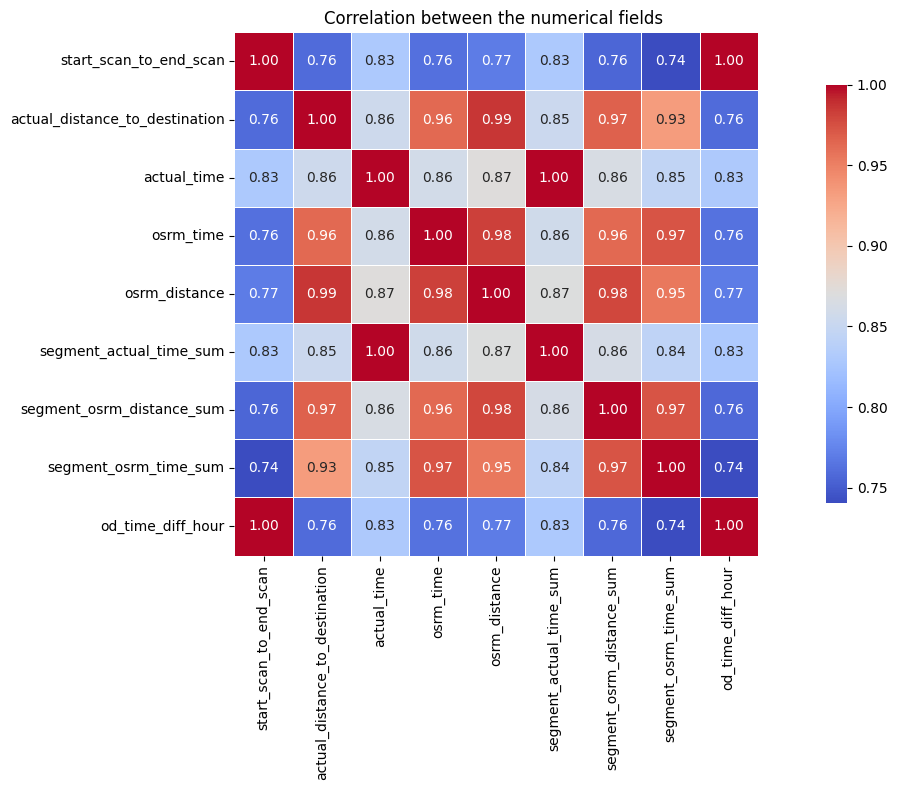

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(trip_df[numeric_columns].corr(),
            annot = True,
            fmt = ".2f",
            cmap = "coolwarm",
            linecolor = "white",
            linewidth = 0.5,
            cbar_kws = {"shrink": 0.8},
            square = True)
plt.title("Correlation between the numerical fields ")
plt.tight_layout()

<font color = 'blue'>**ANALYSIS:**</font>

- Values range from 0.74 to 1.00, indicating **strong to perfect positive correlations** across the board.
- Color scale:
  - Red (close to 1) = strong positive correlation.
  - Blue (closer to 0.74) = relatively weaker (but still strong) positive correlation.
- **Perfect or near-perfect correlations between total and segment values validate the correctness of aggregation logic.**
- While predicted and actual values correlate strongly, some variation (especially in time) highlights the **need to model real-world delays for improved prediction.**

# <font color = 'red'>**OBSERVATIONS:**</font>

1. <font color = 'blue'>**Data Cleaning & Preprocessing**
  - Successfully **handled missing values and performed one-hot encoding** for the route_type feature.
  - **Created additional useful features** like segment_key, od_time_diff_hour, and parsed location strings into structured columns (state, city, place, code).
  - **Aggregated segment-level data** to meaningful trip_df level using logical groupings and aggregation functions.

2. <font color = 'blue'>**Descriptive Statistics**</font>
  - **Time-related columns** (actual_time, osrm_time, segment_actual_time_sum) showed a right-skewed distribution, **with mean > median, indicating the presence of outliers or high-variance trips.**
  - **start_scan_to_end_scan and od_time_diff_hour** showed precise alignment, validating logical consistency in the data.

3. <font color = 'blue'>**Visual Analysis**</font>
  - **Countplots and pie charts** for trip_month, trip_day, trip_hour, showed operational peaks in certain months/hours — **indicating logistics load patterns.**
  - **Density plots and histograms helped identify skewness and potential anomalies** (e.g., negative or extremely high values in segment-level durations).

4. <font color = 'blue'>**Hypothesis Testing & Correlations**</font>
  - Strong positive correlation was observed between:
    - actual_time & osrm_time
    - actual_time & segment_actual_time_sum
    - osrm_distance & segment_osrm_distance_sum
    - osrm_time & segment_osrm_time_sum

 - This **supports the consistency and reliability of segment-wise aggregation**.
 - **Pearson correlation** further confirmed these associations, justifying the model logic and variable integrity.

5. <font color = 'blue'>**Location-Based Insights**</font>
  - **Location parsing** showed diverse city-state combinations, with a few states and cities dominating the dataset.
  - **Discrepancies or edge cases in parsing** were handled with custom logic (e.g., pnq pashan dpc, hbr layout pc → mapped to correct cities).

6. <font color = 'blue'>**Time-based Anomalies**</font>
  - Gaps in dates (e.g., missing trips between 4th to 11th) suggest:
    - Possible data collection/entry issues
    - Backend downtime or maintenance windows
    - Non-operational days (weekends/holidays)

7. <font color = 'blue'>**Overall Quality & Readiness**</font>
  - The dataset is well-structured, and the derived features are reliable for:
    - Modeling travel times
    - Route efficiency analysis
    - Operational optimization



# <font color ='red'>**RECOMMENDATIONS:**</font>

- Presence of outliers, missing values had biased the data which were handled by removing them.
- The  actual_time, actual_distance came as factor of 7x-10x of the osrm_time, osrm_distance.
- These were adjusted after Data Cleaning and Feature Engineering to the dataset.
-Segment-level and trip-level aggregations align well (e.g., actual_time ≈ sum of segment_actual_time), confirming that segment aggregation logic is sound.

<font color ='blue'>**The following recommendations can be implemented for more data precison, accuracy and efficient data modelling:**</font>

- **Clean up time anomalies** (e.g., negative segment times) and fill in or explain data gaps (293 missing rows for source_name, dates between 4-11 of the months).

- Ensure **standardized naming** for centers and locations to prevent parsing issues.

- Focus on trips with **high actual_time / osrm_time ratios** — likely delay hotspots.
    - **Investigate trips where actual_time / osrm_time > 2.5**, as they may involve:
      - Traffic jams
      - Detours
      - Warehouse inefficiencies

- Tag **routes consistently exceeding expected times** and investigate underlying causes.

- Investigate **high-delay source centers like SC001**, which have 2x the median delivery time

- **Target Distance_metrics**
    - Maximum actual_distance_to_destination = 2186 km
    - Mean: ~164 km
    - **Cap maximum trip distance at 1000 km for focused operational monitoring.**
    - **Trips beyond that are either outliers or very long-hauls needing special treatment.**

- **Target High Delay Regions (Segment Level)**
  - Max segment_actual_time_sum: 6230 mins (~104 hours)
  - 75th percentile: 364 mins
  - **Trips with segm**ent_actual_time_sum > 500 mins should be flagged for route re-evaluation.

- **OSRM vs. Actual Deviation Threshold**
  - Avg difference: actual_time - osrm_time ≈ 195 minutes
  - **If the deviation exceeds 200 mins, investigate causes and add buffer if it's consistent by route.**

- **Address Long Start-to-End Gaps**
  - Mean start_scan_to_end_scan: 529 mins
  - Max: 7898 mins (~ 5.5 days)
  - Set a threshold of 12 hours (720 mins) for normal operations.
  - Trips exceeding this should be escalated to operations teams.

- **Automate routing adjustments** in lanes where OSRM time is much shorter than actual — potential to cut delivery time by 15-20%.

- **Prioritize optimization on routes** that consistently underperform vs. OSRM.

- F**ocus on expanding FTL in underperforming corridors** where feasible — they are consistently faster - North Eastern Region, where there is hardly any presence.




# <font color ='red'>**CONCLUSION**</font>

The project provided **valuable insights into trip dynamics, route performance, and time efficiency within the logistics network**. Through careful **analysis of actual versus expected travel times and distances, we uncovered patterns that can drive operational improvements.** The study **highlights opportunities to enhance planning accuracy, streamline delivery operations, and build more reliable forecasting models.** With these learnings, <font color = 'red'>**Delhivery**</font> is better equipped to optimize routing strategies and deliver a more efficient, predictable logistics experience going forward.